In [ ]:
! git clone https://github.com/rmsouza01/ENSF619.2.git
! git clone https://github.com/rmsouza01/siamxt.git; cd siamxt; python setup.py install

## **Importing necessary libaries**

In [ ]:
import numpy as np # numpy is used for building siamxt in array style!    
from PIL import Image # We are using PIL to read images 
import matplotlib.pyplot as plt # and matplotlib to display images
import siamxt 
#these libararies were used in part 4
from PIL import Image, ImageFilter, ImageOps 
from scipy.ndimage import gaussian_filter #gaussian-filter for filtering the image

##**Some useful functions**

In order to the code to be organized, we decided to use some functions for some parts of solving the question as they were repeated in different parts. The functions used in this assignments are listed below cell, respectively. 

In [ ]:
#Function 1

# Matrix for structuring the elements with connectivity-8
def structure_with_eight_connectivity():
    Bc = np.ones((3,3), dtype = bool)
    return Bc


#Function 2

#bounding-box filter function, aiming to extracted arteries' wall from the max-tree nodes in given criteria of  Wmin, Hmin, Wmax, Hmax, etc.
def bounding_box_filter(img, Wmin, Hmin, Wmax, Hmax, rr_min, rr_max,  artery_xmax_coordinate, artery_xmin_coordinate):

    # Building the max-tree of the negated image, i.e. min-tree
    mxt = siamxt.MaxTreeAlpha(img, structure_with_eight_connectivity())
    # Bounding box-lengths
    dx = mxt.node_array[7,:] - mxt.node_array[6,:]
    dy = mxt.node_array[10,:] - mxt.node_array[9,:]
    # Rectangularity ratio
    RR = mxt.computeRR()
    # Node selection criteria
    nodes = (dx>Hmin) & (dx<Hmax) & (dy > Wmin) & (dy < Wmax) & (mxt.node_array[6,:] > artery_xmin_coordinate) & (mxt.node_array[6,:] < 
    artery_xmax_coordinate) & (RR > rr_min) & (RR < rr_max)  
    #Filtering the max-tree
    mxt.contractDR(nodes)
    # Recovering the filtered the image
    img_filtered = mxt.getImage()
    return img_filtered


#Function 3 

#function for displaying the image
def show_image(img, title):
    fig = plt.figure(figsize=(5,6))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.show()


#Function 4

#fuction for getting the negative of the image for further process
def get_negative_img(img):
  # Negating the image
  img_max = img.max()
  img_neg = img_max-img
  return img_neg


#Function 5 

#area-open filter function, aiming to remove nodes with area smaller than a threshold.
def area_open_filter(img, Bc, area):
  #Building the max-tree of the negated image
  mxt = siamxt.MaxTreeAlpha(img,Bc)
  #Applying an area-open filter
  mxt.areaOpen(area)
  #Recovering the image 
  img_filtered =  mxt.getImage()
  return img_filtered


#Function 6

#Function for displaying the original and filtered image
def plot_image(img,title_1,title_2):
  fig = plt.figure(dpi=100)
  plt.subplot(1,2,1)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.title(title_1)

  plt.subplot(1,2,2)
  plt.imshow(img_filtered, cmap='gray')
  plt.axis('off')
  plt.title(f'{title_2}, area = {area}')  


#Function 7

#bounding-box filter function, aiming to extracted pens from the max-tree nodes in given criteria of  Wmin, Hmin, Wmax, Hmax, etc.
def bounding_box_filter_2(img, Wmin, Hmin, Wmax, Hmax, rr_min, rr_max):

  # Building the max-tree of the negated image by using 'get_negative_image' function above!
  mxt = siamxt.MaxTreeAlpha(get_negative_img(img), structure_with_eight_connectivity())
  # Bounding box-lengths
  dx = mxt.node_array[7,:] - mxt.node_array[6,:]
  dy = mxt.node_array[10,:] - mxt.node_array[9,:]
  # Rectangularity ratio
  RR = mxt.computeRR()
  # Node selection criteria
  nodes = (dx>Hmin) & (dx<Hmax) & (dy > Wmin) & (dy < Wmax) & (RR > rr_min) & (RR < rr_max)  
  #Filtering the max-tree
  mxt.contractDR(nodes)
  # Recovering the filtered the image
  img_filtered = mxt.getImage()
  return img_filtered  

## **Questions**

###**Part 1)** **Using the max tree area signature analysis, determined CCs in the max tree that separate Mona Lisa’s face from the background.**

Image shape is (317, 213)


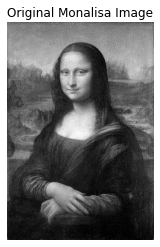

Text(0.5, 1.0, 'Reconstruction at h = 85')

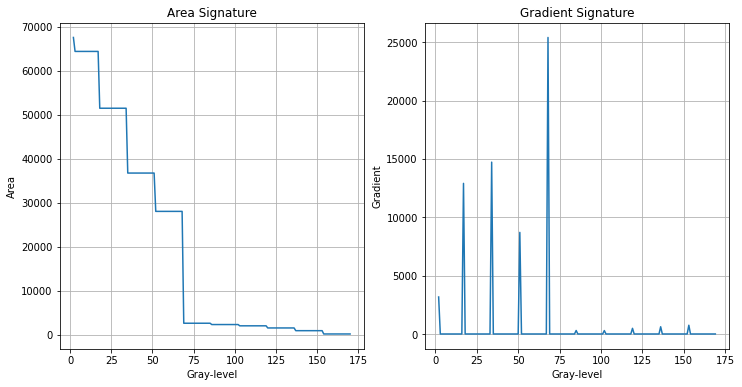

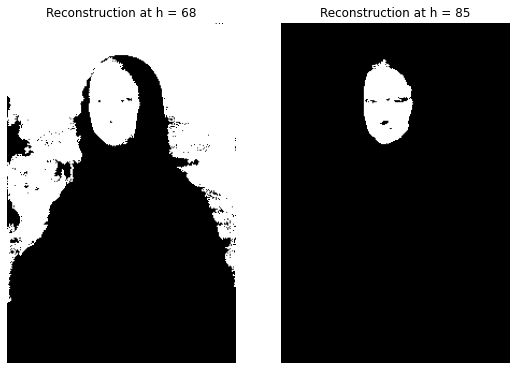

In [ ]:
# Loading the image.
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/monalisa.png").convert("L"))
print(f'Image shape is {img.shape}')

#Displaying the image
fig = plt.figure()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original Monalisa Image")
plt.show()

#Structuring element with connectivity-8 by using "structure_with_eight_connectivity" function above!
structure_with_eight_connectivity()

# Building the max-tree
mxt = siamxt.MaxTreeAlpha(img,Bc)

#Hand-picked regional maxima
x,y = 83,90

# Node corresponding to a regional maximum
node = mxt.node_index[x, y]

# Extracting area attribute from NA
area = mxt.node_array[3,:]

# Area signature computation
levels,signature =  mxt.getSignature(area, node)

#Gradient of the area signature
gradient = signature[0:-1] - signature[1:]

# Display area signature
fig = plt.figure(figsize = (12,6))
plt.subplot(121)
plt.plot(levels,signature)
plt.grid()
plt.xlabel("Gray-level")
plt.ylabel("Area")
plt.title("Area Signature")


# Display gradient of the area signature
plt.subplot(122)
plt.grid()
plt.plot(levels[0:-1],gradient)
plt.xlabel("Gray-level")
plt.ylabel("Gradient")
plt.title("Gradient Signature")


# Selecting the peak of the gradient
index = np.argsort(gradient)[::-1][0]

#reconstructing the node corresponding to the peak (largest area)
area1 = signature[index]
node1 = np.where(mxt.node_array[3,:] == area1)[0][0]
cc1 = mxt.recConnectedComponent(node1)

#reconstructing the node corresponding to the peak (smaller area)
area2 = signature[index + 1]
node2 = np.where(mxt.node_array[3,:] == area2)[0][0]
cc2 = mxt.recConnectedComponent(node2)

#Displaying the nodes reconstructed    
fig = plt.figure(figsize=(9,7))
plt.subplot(121)
plt.imshow(cc1, cmap='Greys_r')
plt.axis('off')
plt.title(f'Reconstruction at h = {mxt.node_array[2,node1]}')
plt.subplot(122)
plt.imshow(cc2, cmap='Greys_r')
plt.axis('off')
plt.title(f'Reconstruction at h = {mxt.node_array[2,node2]}')

##**Part 2) Apply a series of filters to this image to segment the carotid arteries wall**
For this question, by manually trying several times (trial & error approach), we first find the approximate coordinate of the arteries, as they (left+right arteries) are somehow parallel. So, after finding the coordinate, we set our filter node parameters with respect to hight and width of *these* coordinates, i.e., `(mxt.node_array[6, :] > artery_xmin_coordinate)`.

Image shape is: (322, 322)


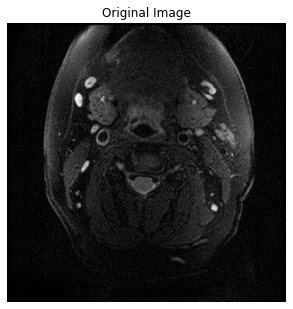

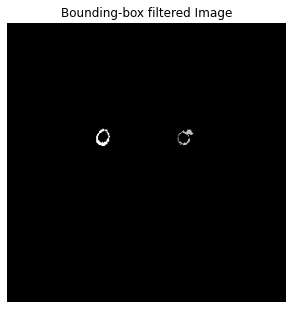

In [ ]:
# Loading the image.
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/carotid.png").convert("L"))
print(f'Image shape is: {img.shape}')

#Displaying the original image by using "show_image" function above!
show_image(img, "Original Image")

Wmin = 12.94  # Minimum bounding-box width
Hmin = 6.93 # Minimum bounding-box height
Wmax = 18 # Maximum bounding-box width
Hmax = 19.6 # Maximum bounding-box height
rr_min = 0.28 # Minimum rectangularity ratio
rr_max = 0.37 # Maximum rectangularity ratio
artery_xmax_coordinate = 145 #maximum x-coordinate of target left and right arteries, i.e. hight of the artery
artery_xmin_coordinate = 97 #minimum x-coordinate of target left and right arteries, i.e. hight of the artery

#Applying Filter to the image on given aforementioned criteria by using "bounding_box_filter" function above!
img_filtered = bounding_box_filter(img, Wmin, Hmin, Wmax, Hmax, rr_min, rr_max, artery_xmax_coordinate, artery_xmin_coordinate)

#Displaying the filtered image, by using the 'show_image' function above!
show_image(img_filtered, "Bounding-box filtered Image")    

##**Part 3) Apply a series of filters to remove the white artifacts in the image.**



Image shape is:(320, 213)


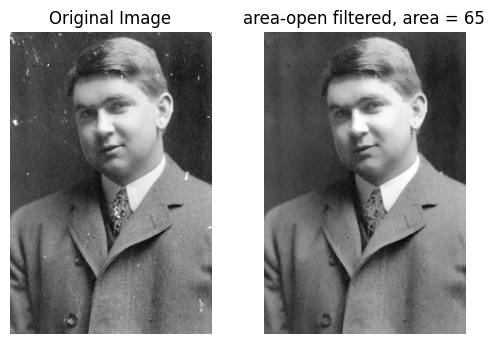

In [ ]:
# Loading the image.
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/filtering-image.jpg").convert("L"))
print(f'Image shape is:{img.shape}')

# Area threshold
area = 65

#Applying Filter to the image on given area by using "area_open_filter" function above!
img_filtered = area_open_filter(img, Bc, area)

#Displaying the original and filtered image, by using the 'plot_image' function above!
plot_image(img,title_1= "Original Image", title_2= "area-open filtered")  


##**Part 4)Apply a series of filters that will remove all objects in the image except for the two pens.**
**Approach 1)**

Applying `bounding_box_filter_2` filter. For this question, by manually trying several times (trial & error approach), we first find the approximate coordinate of the pens. Then, we set our filter node parameters with respect to hight and width of these coordinates. 

One major point of this filter is that the inputs to our maxtree is the negated image (by using `get_negative_img` function) in order the filter to be applied on black components while in *part 2* the input image was already in black!

please note that the function for approach 1 of this question is `function 7` being `bounding_box_filter_2`.

**Approach 2)**

Applying `gaussian_filter` filter to remove all the objects except pens. 

**Approach 1)**

Image shape is: (381, 384)


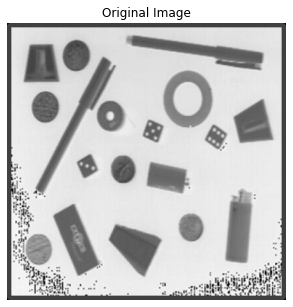

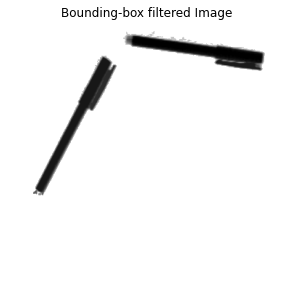

In [ ]:
# Loading the image.
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/objects.png").convert("L"))
print(f'Image shape is: {img.shape}')

#Displaying the original image by using "show_image" function above!
show_image(img, "Original Image")

#proposed criteria 
Wmin = 68 # Minimum bounding-box width
Hmin = 22 # Minimum bounding-box height
Wmax = 195 # Maximum bounding-box width
Hmax = 194 # Maximum bounding-box height
rr_min = 0.1 # Minimum rectangularity ratio
rr_max = 0.4 # Maximum rectangularity ratio
  
#applying the "bounding box filter_2" function above on given aforementioned criteria!  
img_filtered = bounding_box_filter_2(img, Wmin, Hmin, Wmax, Hmax, rr_min, rr_max)

# Getting the negative of the filtered image
img_filtered_neg = img_filtered.max() - img_filtered

#Displaying the filtered image, by using the 'show_image' function above!
show_image(img_filtered_neg, "Bounding-box filtered Image")    

 **Approach 2)**

In [ ]:
#for this approach, we upload the image in the drive and mount it
drive.mount('/content/gdrive')

In [ ]:
# Visualize grayscale images
def show_image(im):
  plt.imshow(im, cmap='gray')
  plt.axis('off')
  plt.show()

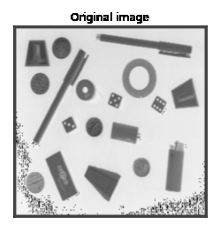

In [ ]:
# Loading image
im_path = 'gdrive/MyDrive/sample_image.png'
im = Image.open(im_path)
# Converting to numpy array and getting rid of unnecessary channels
im = np.array(im)[:,:,0]
show_image(im)

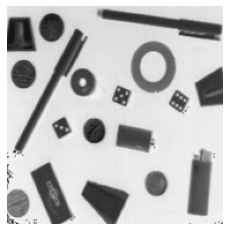

In [ ]:
w, h = im.shape
w_crop_size = int(w * 0.12)
h_crop_size = int(h * 0.1)
# Center cropping the image: Getting rid of the text at the top and the four strips
center_cropped_im = im[w_crop_size: w - w_crop_size, h_crop_size: h - h_crop_size]
show_image(center_cropped_im)

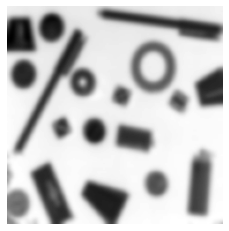

In [ ]:
# getting rid of the noise by applying a gaussian filter to the image
blurred_im = gaussian_filter(center_cropped_im, sigma=2)
show_image(blurred_im)

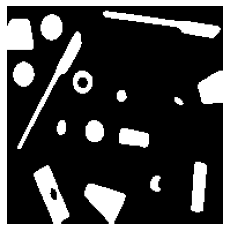

In [ ]:
# Removing the bright background and keeping the dark bjects
initial_mask = blurred_im < 128
show_image(initial_mask)

In [ ]:
dx = [-1, 0, 0, 1]
dy = [0, -1, 1, 0]

# Running a DFS to identify all pixels belonging to a connected component
def fill(x, y, object_matrix, initial_mask, object_id):
  object_matrix[x][y] = object_id

  # Iterating over all 4 neighbors (4 directions)
  for k in range(4):
    nx = x + dx[k]
    ny = y + dy[k]

    # check if the neighbor is valid
    if nx < 0 or ny < 0 or nx >= object_matrix.shape[0] or ny >= object_matrix.shape[1] or initial_mask[nx][ny] == False:
      continue

    # check if the neighbor is not previously visited
    if object_matrix[nx][ny] != 0:
      continue

    fill(nx, ny, object_matrix, initial_mask, object_id)

In [ ]:
object_matrix = np.zeros(initial_mask.shape)
object_count = 0

for i in range(object_matrix.shape[0]):
  for j in range(object_matrix.shape[1]):
    # Check if the pixel belongs to a new object
    if initial_mask[i][j] == True and object_matrix[i][j] == 0:
      object_count += 1
      fill(i, j, object_matrix, initial_mask, object_count)

print('Number of objects detected in the image:', object_count)

Number of objects detected in the image: 16


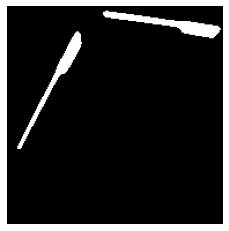

In [ ]:
# Object1 and Object 4 are our two pens. Keep them and remove everything else.
pen_mask = (object_matrix == 1) + (object_matrix == 4)
show_image(pen_mask)

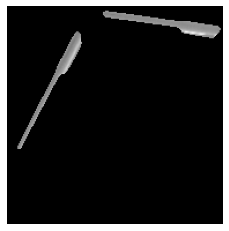

In [ ]:
# Apply the segmentation mask to the original image
show_image(np.multiply(pen_mask, center_cropped_im))

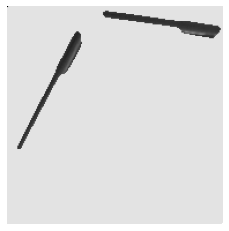

In [ ]:
# Reconstructing the background
background_color = center_cropped_im[1][1]
blurry_background = np.full(center_cropped_im.shape, background_color)
blurry_background[0][0] = np.min(center_cropped_im)
blurry_background[-1][-1] = np.max(center_cropped_im)

# Adding the pens to the background
final_result = np.multiply(1 - pen_mask, blurry_background) + np.multiply(pen_mask, center_cropped_im)

# Visualizing the final result
show_image(final_result)